In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install ann_visualizer

  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=36d658bac3f8761d8a35d8aafa4eafd9a6bf8323677d04a48b86cea5df4c6c1f
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [ ]:
import keras
from keras.datasets import boston_housing

In [ ]:
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
train_X.shape, train_Y.shape,test_X.shape, test_Y.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
train_X= min_max_scaler.fit_transform(train_X)
test_X= min_max_scaler.fit_transform(test_X)

In [ ]:
from tensorflow.keras.layers import Dense   #here dense refer to ANN
from tensorflow.keras.models import Sequential     #tensorflow.keras.models  there aare two type of models sequantial and non sequantial

In [ ]:
Sequential?


In [ ]:
Dense?

In [ ]:
model = Sequential(name = 'ANN_Boston_Housing_Prediction')
model.add(Dense(200, input_dim = train_X.shape[1], activation = 'linear', name = "Input_layer"))
model.add(Dense(150, activation = 'linear', name = "layer_1"))
model.add(Dense(50, activation = 'linear', name = "layer_2"))
model.add(Dense(1, activation = 'linear', name = "layer_3"))

In [ ]:
model.compile?

In [ ]:
model.compile(optimizer='Adam', loss = 'mse', metrics= [keras.metrics.RootMeanSquaredError()])

In [ ]:
model.summary() #13+1 or bias of all weight and so 14X500 =7000

Model: "ANN_Boston_Housing_Prediction"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 200)               2800      
                                                                 
 layer_1 (Dense)             (None, 150)               30150     
                                                                 
 layer_2 (Dense)             (None, 50)                7550      
                                                                 
 layer_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 40551 (158.40 KB)
Trainable params: 40551 (158.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(train_X, train_Y, batch_size=100, epochs=1000, validation_data=(test_X, test_Y))

Epoch 1/1000
5/5 [==============================] - 1s 63ms/step - loss: 542.4098 - root_mean_squared_error: 23.2897 - val_loss: 466.3991 - val_root_mean_squared_error: 21.5963
Epoch 2/1000
5/5 [==============================] - 0s 11ms/step - loss: 389.6577 - root_mean_squared_error: 19.7397 - val_loss: 298.8080 - val_root_mean_squared_error: 17.2861
Epoch 3/1000
5/5 [==============================] - 0s 15ms/step - loss: 227.9083 - root_mean_squared_error: 15.0966 - val_loss: 155.3157 - val_root_mean_squared_error: 12.4626
Epoch 4/1000
5/5 [==============================] - 0s 10ms/step - loss: 123.8536 - root_mean_squared_error: 11.1290 - val_loss: 154.9738 - val_root_mean_squared_error: 12.4488
Epoch 5/1000
5/5 [==============================] - 0s 14ms/step - loss: 152.4562 - root_mean_squared_error: 12.3473 - val_loss: 130.2231 - val_root_mean_squared_error: 11.4115
Epoch 6/1000
5/5 [==============================] - 0s 15ms/step - loss: 108.0840 - root_mean_squared_error: 10.396

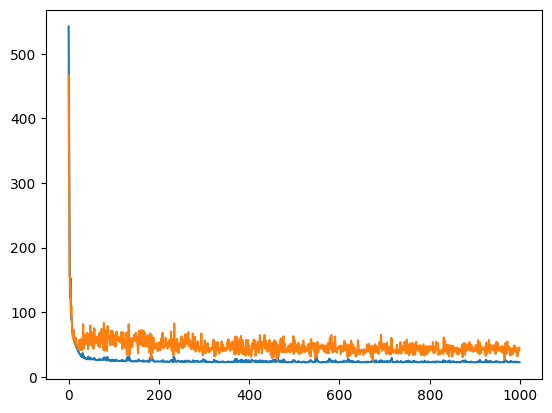

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
model.evaluate(test_X, test_Y) #evalution  mean you know the ground truth

4/4 [==============================] - 0s 3ms/step - loss: 43.8808 - root_mean_squared_error: 6.6243


[43.88075256347656, 6.6242547035217285]

In [ ]:
preds = model.predict(test_X)

4/4 [==============================] - 0s 3ms/step


In [ ]:
for i in range(preds.shape[0]):
  print(preds[i], test_Y[i])

[-2.876222] 7.2
[16.26152] 18.8
[17.734743] 19.0
[30.21855] 27.0
[22.698393] 22.2
[16.52929] 24.5
[27.032345] 31.2
[22.224987] 22.9
[15.827801] 20.5
[16.930586] 23.2
[14.884761] 18.6
[13.302451] 14.5
[11.308239] 17.8
[34.79557] 50.0
[9.14503] 20.8
[16.819883] 24.3
[22.481106] 24.2
[18.343475] 19.8
[13.055059] 19.1
[17.32592] 22.7
[0.34195054] 12.0
[6.3226757] 10.2
[18.423248] 20.0
[8.90182] 18.5
[19.478153] 20.9
[17.39094] 23.0
[30.685528] 27.5
[24.346052] 30.1
[3.7107646] 9.5
[17.902092] 22.0
[19.523453] 21.2
[10.013271] 14.1
[34.796146] 33.1
[21.049002] 23.4
[9.512645] 20.1
[-8.521894] 7.4
[8.547248] 15.4
[17.870289] 23.8
[10.813091] 20.1
[26.201002] 24.5
[21.359549] 33.0
[25.9335] 28.4
[9.453088] 14.1
[34.20254] 46.7
[28.266468] 32.5
[21.340593] 29.6
[28.488094] 28.4
[13.9635935] 19.8
[16.315645] 20.2
[21.174978] 25.0
[30.714891] 35.4
[15.450201] 20.3
[-0.44601312] 9.7
[8.542384] 14.5
[33.320724] 34.9
[25.201427] 26.6
[8.25764] 7.2
[40.191628] 50.0
[36.026527] 32.4
[21.905825] 21.6


In [ ]:
#from ann_visualizer.visualize import ann_viz

In [ ]:
#ann_viz(model, filename='Ann.gv')